# Laden des Datensets - Fahrrad und DB

In der Jupyter-Datei "download_twitter_data.ipynb" werden einzelne Pickle-Dateien zum Thema Fahrrad und Bahn erstellt. Dieses Jupyter-Notebook wurde seit dem 01.05.2022 jede Woche ausgeführt. Die einzelnen Pickle-Dateien mit den gefundenen Tweets müssen nun zu einem Datenset zusammengeführt werden.

## Vorgehensweise

Zunächst müssen die hierfür benötigten Bibliotheken importiert werden.

In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join

Danach werden die vorhandenen Dateien in dem Ordner "Tweets" in einer großen Liste "files" gespeichert.

In [2]:
files = [f for f in listdir('Tweets') if isfile(join('Tweets', f))]

Um aus diesen Listenelementen ein großes Datenset zu kreieren, werden sie zu einem DataFrame konkatiniert.

In [3]:
df = pd.DataFrame()
for file in files:
    df = pd.concat([df, pd.read_pickle('Tweets/'+file)]) # TODO change file path for windows

Um einen groben Überblick über das erstellte Datenset zu bekommen, wird es an dieser Stelle ausgegeben.

In [4]:
df

,in_reply_to_user_id,referenced_tweets,id,lang,conversation_id,author_id,text,created_at,public_metrics.retweet_count,public_metrics.reply_count,...,public_metrics.quote_count,query,context_annotations,attachments.media_keys,geo.place_id,geo.coordinates.type,geo.coordinates.coordinates,withheld.copyright,withheld.country_codes,attachments.poll_ids
0,1499766212003254274,"[{'type': 'replied_to', 'id': '155022106042296...",1550337587176513537,de,1550194102834192384,1442110828686102537,@EliaBibiani Mit der Regio den Brenner rauf un...,2022-07-22T04:30:59.000Z,0,0,...,0,regio Fahrrad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1548737870017470470,de,1548737870017470470,1010461609616183296,warum als mensch nimmst du dein fahrrad mit in...,2022-07-17T18:34:17.000Z,0,2,...,0,regio Fahrrad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,502218509,"[{'type': 'replied_to', 'id': '155045046126167...",1550451322234757123,de,1550154723914911744,1303775692266639360,@jankru81 @aimjaypi @FJ2103 @KPSegatz @Regio_N...,2022-07-22T12:02:55.000Z,0,0,...,0,regio rad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1303775692266639360,"[{'type': 'replied_to', 'id': '155044686396231...",1550450461261676546,de,1550154723914911744,502218509,@EhmHeyitsme @aimjaypi @FJ2103 @KPSegatz @Regi...,2022-07-22T11:59:30.000Z,0,2,...,0,regio rad,"[{'domain': {'id': '123', 'name': 'Ongoing New...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1550365310766776321,nl,1550365310766776321,440674484,Rad van avontuur bracht Piet en Nel van de Wei...,2022-07-22T06:21:09.000Z,0,0,...,0,regio rad,NaN,[3_1550365308552187904],NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,NaN,NaN,1525659265985290240,en,1525659265985290240,44665795,We hope your weekend looks and feels just like...,2022-05-15T02:08:09.000Z,2,0,...,0,RE Mountainbike,"[{'domain': {'id': '6', 'name': 'Sports Event'...",[3_1525659263326212096],NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,"[{'type': 'retweeted', 'id': '1524118372694253...",1524150535431102465,en,1524150535431102465,1282001810144792578,RT @OutbackMTB: When you're too fast for reali...,2022-05-10T22:12:59.000Z,1,0,...,0,RE Mountainbike,"[{'domain': {'id': '66', 'name': 'Interests an...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1524118372694253570,en,1524118372694253570,1287460950468165632,When you're too fast for reality 😎\nFollow ➡️ ...,2022-05-10T20:05:11.000Z,1,0,...,0,RE Mountainbike,"[{'domain': {'id': '66', 'name': 'Interests an...",[7_1524118333813104643],NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,1523454069712449542,en,1523454069712449542,1331751832750678016,Wondering if you’re addicted to mountain bikin...,2022-05-09T00:05:29.000Z,0,0,...,1,RE Mountainbike,"[{'domain': {'id': '66', 'name': 'Interests an...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Um einen Eindruck für die einzelnen Tweets zu bekommen und ihre Gewichtung zu erkennen, wird die maximale Anzahl des Retweet Counts, des Reply Counts, des Like Counts und der Quote Counts betrachtet. Die entstehende Tabelle wird auf die ID des Accounts gruppiert und gibt außerdem in der Spalte "query" die Synonym-Paar Kombinationen, erstellt in der Jupyter-Datei "download_twitter_data.ipynb", an, in denen die Tweets des Accounts fallen.

In [5]:
df_tmp = df[['id', 'created_at', 'public_metrics.retweet_count', 'public_metrics.reply_count', 'public_metrics.like_count', 'public_metrics.quote_count','query']]
df_tmp = pd.merge(df_tmp.groupby('id').agg({'public_metrics.retweet_count': 'max', 
                          'public_metrics.reply_count': 'max', 
                          'public_metrics.like_count': 'max', 
                          'public_metrics.quote_count': 'max'}),
         df_tmp.groupby('id')['query'].apply(list),
         on='id', how='inner')


Um die Daten übersichtlicher zu machen und sie zur Datenanalyse vorzubereiten müssen ein paar Veränderungen an dem Datenset vorgenommen werden. Zunächst werden Dopplungen der Tweets herausgenommen, und Zeilen mit nicht vorhandenen Werten heausgenommen. 
Danach wird eine Spalte "is_retweet" erstellt, die die Information über den Tweet mithilfe dem Wert 0 (nicht retweeetd) oder 1 (retweeted) erweitert.
Die Spalte "created_at_day" gibt das Erstellungsdatum des Tweets in der Form YYYY-MM-DD an, wobei diese Information eine Verkürzung der zu findenen Information in Spatle "created_at" darstellt.

In [6]:
df = pd.merge(df[['text', 'id',
             'public_metrics.retweet_count', 
             'public_metrics.reply_count',
             'public_metrics.like_count', 
             'public_metrics.quote_count',             
             'lang',
             'created_at', 
             'conversation_id', 
             'author_id', 
            ]].drop_duplicates(), 
         df_tmp.reset_index(),
         on=['id',
             'public_metrics.retweet_count', 
             'public_metrics.reply_count',
             'public_metrics.like_count', 
             'public_metrics.quote_count'], 
         how='right').dropna()
df['is_retweet'] = pd.np.where(df.text.str.startswith('RT '),1,0)
df['created_at_day'] = df['created_at'].apply(lambda x: x[:10])
df['created_at_day'] = pd.to_datetime(df['created_at_day']).dt.date

<ipython-input-6-03000e42776a>:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['is_retweet'] = pd.np.where(df.text.str.startswith('RT '),1,0)


In [7]:
df[(df['public_metrics.retweet_count'] > 0) & (df['public_metrics.retweet_count'] < 5)]

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day
1,"RT @spmrider: ICE 4, Fahrräder in Wagen 1 - bi...",1518198704490037249,2,0,0,0,de,2022-04-24T12:02:32.000Z,1518198704490037249,923544086,[ICE rad],1,2022-04-24
21,RT @lowercayce: I have even more love for all ...,1518235889167593472,2,0,0,0,en,2022-04-24T14:30:18.000Z,1518235889167593472,701502940566069248,[ICE rad],1,2022-04-24
23,#PSA our recent data collection project shows ...,1518236320149106688,1,0,0,0,en,2022-04-24T14:32:00.000Z,1518236320149106688,1434023642447286273,[RE ebike],0,2022-04-24
29,RT @BeautyHealthHip: One Of Best Exercise Bike...,1518245037850697730,1,0,0,0,en,2022-04-24T15:06:39.000Z,1518245037850697730,4077758069,[IC bike],1,2022-04-24
30,RT @epowersportllc: #PSA our recent data colle...,1518247878774431744,1,0,0,0,en,2022-04-24T15:17:56.000Z,1518247878774431744,2369054990,[RE ebike],1,2022-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22380,RT @EgiDiyar72: Rojnameger Erdal Er:\nLi Zaxoy...,1550762561230016512,1,0,0,0,ro,2022-07-23T08:39:41.000Z,1550762561230016512,1547887984933974018,[RE bike],1,2022-07-23
22386,RT @ertl67: Rojnameger Erdal Er:\nLi Zaxoyê ko...,1550762991406153728,4,0,0,0,ro,2022-07-23T08:41:23.000Z,1550762991406153728,1440564485064835072,[RE bike],1,2022-07-23
22406,RT @ertl67: Rojnameger Erdal Er:\nLi Zaxoyê ko...,1550766875134824449,4,0,0,0,ro,2022-07-23T08:56:49.000Z,1550766875134824449,1475161212971327491,[RE bike],1,2022-07-23
22409,"RT @MattPinder1: In most of North America, you...",1550767167238418432,1,0,0,0,en,2022-07-23T08:57:59.000Z,1550767167238418432,222358903,[RE bike],1,2022-07-23


In [8]:
df[df.lang=='de']

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day
1,"RT @spmrider: ICE 4, Fahrräder in Wagen 1 - bi...",1518198704490037249,2,0,0,0,de,2022-04-24T12:02:32.000Z,1518198704490037249,923544086,[ICE rad],1,2022-04-24
2,RT @Christoph_Br1: Warum sind es eigentlich im...,1518198853580767232,6,0,0,0,de,2022-04-24T12:03:08.000Z,1518198853580767232,966594033027035136,[Zug Fahrrad],1,2022-04-24
3,RT @Micha31281963: Sonntags in den Zoo?\nDie #...,1518199273569062912,46,0,0,0,de,2022-04-24T12:04:48.000Z,1518199273569062912,20429503,[Stadtbahn Fahrrad],1,2022-04-24
6,@radkolumne Seit nun 2 Monaten: Bahn Bus Tram...,1518205949185560577,0,0,0,0,de,2022-04-24T12:31:19.000Z,1518199287871676417,2791876688,[Tram Fahrrad],0,2022-04-24
7,@radkolumne Hab mir gestern extra noch ein geb...,1518208189724045312,0,1,6,0,de,2022-04-24T12:40:14.000Z,1518199287871676417,1108457893555326978,[Zug rad],0,2022-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22307,@advitwit genau. Pull hat im ÖPNV nie funktion...,1550750716880355329,0,1,2,0,de,2022-07-23T07:52:37.000Z,1550738488366071810,773940,[ÖPNV rad],0,2022-07-23
22309,@JGronenberg @JannikHv @davstier @tagesschau U...,1550751332113567744,0,1,1,0,de,2022-07-23T07:55:03.000Z,1550664013519921152,1434449603932327937,[Tram rad],0,2022-07-23
22317,@reginesradsalon @kiananinchen Was nichts dara...,1550753534521614336,0,1,0,0,de,2022-07-23T08:03:48.000Z,1550706666156527617,977071948286001152,[Bus Fahrrad],0,2022-07-23
22320,"Kommunismus ist , wenn man , statt Straßenbahn...",1550756032250449920,0,0,0,0,de,2022-07-23T08:13:44.000Z,1550756032250449920,1213574138725429248,[Straßenbahn rad],0,2022-07-23


Im Weiteren werden nur Daten betrachtet, die kein Retweet sind (da die Informationen sich inhaltlich bei diesen Tweets nicht von ihrem Original-Tweet unterscheiden) und in der Sprache Deutsch verfasst wurden.

In [9]:
df_selected = df[(df.is_retweet == 0) & (df.lang=='de')]

Um einen groben Überblick über die Verteilung der Likes zu bekommen, wird hier ein Histogramm gezeichnet.

In [10]:
# Importsimport matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df_selected[df_selected['public_metrics.like_count']<101], x="public_metrics.like_count")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Verteilung der Likes')
fig.show()

Es wird mithilfe des Graphen klar, dass es viele Tweets mit wenigen Likes gibt und nur wenige, im Verhältnis zu den anderen, mit extrem vielen Likes.

Um einen Eindruck zu bekommen, welche Wörter in den Tweets am häufigsten benutzt worden sind, wird eine WordCloud zur Hilfe genommen. Ein Tutorial hierzu findet man unter anderem hier: https://pythonspot.com/nltk-stop-words/ (Abgerufen: 18.07.2022)

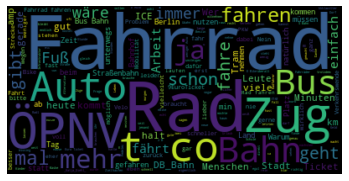

In [11]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create stopword list:
stopwords = set(nltk.corpus.stopwords.words('german'))
stopwords.update(["gt", "https"])
textt = " ".join(review for review in df_selected[df_selected.lang=='de'].text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

Da wir mit der Wordcloud ersteinmal nicht sofort weiterkommen, beschließen wir direkt in die Tweets zu schauen. Hier ein Beipsiel-Code um in die Tweets des Datensatzes zu schauen:

In [12]:
df[df.lang=='de'][['text','public_metrics.like_count']].sort_values(by='public_metrics.like_count', ascending=False)['text'].iloc[9]

'Alle Autofahrten durch Rad &amp; Bahn ersetzen?\nNein, 90 % genügen.'

Um mit den Likes auf den Tweets weiterzuarbeiten, werden die Tweets mit iheren zugehörigen Likes im folgenden in einer CSV-Datei "test.csv" mit ihren Werten aufsteigend gespeichert.

In [13]:
df[df.lang=='de'].sort_values(by='public_metrics.like_count', ascending=False).text.to_csv('test.csv')

Uns fällt auf, dass beim Vergleich von einem Tweet mit seinen Likes auf der Twitter-Plattform und bei den Likes die wird von der Twitter-API bekommen haben, starke Abweichungen auftreten können. Dies liegt anscheinend daran, dass man pro Anfrage mit dem verwendeten Essential-Account auf angezeigte Likes pro Tweet limitiert wird. 

https://developer.twitter.com/en/docs/twitter-api/tweets/likes/migrate/manage-likes-standard-to-twitter-api-v2
https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api

Wir beschließen die Tweets zu filtert, indem nach einem 9 Euro Kontext gesucht wird. Die grobe Idee ist es herauzufinden, wie viele Tweets sich mit dem Kontext 9 Euro identifizieren lassen. Auch hier mussten Synonyme für 9 Euro gefunden werden, damit ein großer Teil der verschiedenen Schreibweisen abgedeckt werden kann.

In [14]:
neun_euro = ['9€', '9 €', '9-€', '9 euro', '9-euro', '9euro', 'neuneuro', 'neun euro', 'neun-euro']

df_neun_euro = pd.DataFrame()
neun_euro_indices = list()

for search_text in neun_euro:
    df_tmp = df_selected[df_selected['text'].str.lower().str.contains(search_text, regex=True)]
    neun_euro_indices += list(df_tmp.index)
    
df_neun_euro['index'] = neun_euro_indices
df_neun_euro = pd.merge(df_selected, df_neun_euro.drop_duplicates(), left_index=True, right_on='index')
df_neun_euro



,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day,index
121,Seit Jahren sagen alle fahrt mehr Bahn. Bahn z...,1519322877279014913,0,1,1,0,de,2022-04-27T14:29:36.000Z,1519322877279014913,712341219716833280,[bahn rad],0,2022-04-27,468
122,"@who_is_Annett ÖPNV nutzen, falls nicht sowies...",1519549859023437826,0,0,2,0,de,2022-04-28T05:31:32.000Z,1519351136695762951,135577783,[ÖPNV Fahrrad],0,2022-04-28,576
146,Werdet Ihr das 9 Euro-Ticket nutzen? \n\nIch ü...,1519674350437285888,0,9,24,0,de,2022-04-28T13:46:13.000Z,1519674350437285888,786118815012704256,[bahn rad],0,2022-04-28,678
242,#9EuroTicket \nbin mal mit dem Fahrrad auf de...,1519906206848065536,0,0,0,0,de,2022-04-29T05:07:32.000Z,1519906206848065536,834440014658416640,[Zug Fahrrad],0,2022-04-29,807
243,#9EuroTicket: Statt superbürokratischen Lösung...,1519964009780367360,17,5,73,1,de,2022-04-29T08:57:14.000Z,1519964009780367360,33557760,[ÖPNV rad],0,2022-04-29,849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,Seit meiner Kindheit fahre ich sehr häufig Bus...,1550478898470813698,0,1,1,0,de,2022-07-22T13:52:30.000Z,1550478898470813698,1502316770853535745,"[Bus rad, bahn rad]",0,2022-07-22,21841
137,@TK_CGN Junge ist das peinlich...9 € Ticket zu...,1550548112472768514,0,0,1,0,de,2022-07-22T18:27:32.000Z,1550233776764108804,1404890581285933058,[ÖPNV Fahrrad],0,2022-07-22,21965
118,"@XYZ42ZYX @rbb24 Genau geht um das 9€ Ticket, ...",1550577841087168514,0,1,0,0,de,2022-07-22T20:25:40.000Z,1550527043716235264,2701653572,[bahn rad],0,2022-07-22,22001
119,@lev0n73 @Koeln Es sind nicht deine Parkplätze...,1550607392659890176,0,0,0,0,de,2022-07-22T22:23:05.000Z,1550134779571421184,1504511125609750528,[bahn Fahrrad],0,2022-07-22,22030


Eine weitere Spalte "neun_euro_context" wird dem Datenset hinzugefügt, um später eine Übersicht über die Häufigkeit der Vorkommnisse des 9€ Kontexts in den Tweets erstellen zu können. 

In [15]:
df_selected['neun_euro_context'] = df_selected.index.isin(neun_euro_indices)

<ipython-input-15-36f7e4f6ff54>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Nun betrachten wir die Anzahl an erstellten Tweets über unseren aufgenommenen Zeitpunkt. Die x-Achse repräsentiert dabei die Zeit nach Tagen und die y-Achse die Anzahl der Tweets. Es ist erwähnenswert, dass die 9 Euro Kontext-Tweets nur einen sehr kleinen Teil des gesamten Datensets ausmachen. Sie machen nicht mehr als ca. 6% des Datensets aus.

<ipython-input-21-5dda6abf05e5>:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



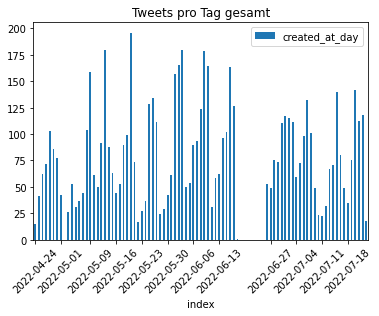

In [21]:
n = 7

ax = df_selected['created_at_day'].value_counts().reset_index().sort_values('created_at_day').plot.bar('index','created_at_day', rot=45, title='Tweets pro Tag gesamt')
ticks = ax.xaxis.get_ticklocs()
ticks.sort()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ticklabels.sort()
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])

ax.figure.show()

In [54]:
len(df_selected)

6748

<ipython-input-22-1988ced7d65f>:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



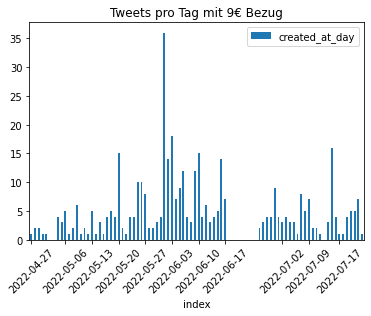

In [22]:
n = 7

ax = df_neun_euro['created_at_day'].value_counts().reset_index().sort_values('created_at_day').plot.bar('index','created_at_day', rot=45, title='Tweets pro Tag mit 9€ Bezug')
ticks = ax.xaxis.get_ticklocs()
ticks.sort()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ticklabels.sort()
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])

ax.figure.show()

Hier suchen wir nach dem Hashtag "#9EuroTicket", um ein Gefühl für die Nutzung des Hashtatgs zu bekommen.

In [23]:
df_selected[df_selected['text'].str.lower().str.contains('9euroticket', regex=True)]#['text'].to_csv('test.csv')

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day,neun_euro_context
807,#9EuroTicket \nbin mal mit dem Fahrrad auf de...,1519906206848065536,0,0,0,0,de,2022-04-29T05:07:32.000Z,1519906206848065536,834440014658416640,[Zug Fahrrad],0,2022-04-29,True
849,#9EuroTicket: Statt superbürokratischen Lösung...,1519964009780367360,17,5,73,1,de,2022-04-29T08:57:14.000Z,1519964009780367360,33557760,[ÖPNV rad],0,2022-04-29,True
1626,@kkklawitter Das habe ich vor! Auch wenn ich e...,1520691597293273089,0,4,19,1,de,2022-05-01T09:08:24.000Z,1520688962519670784,1084516215970824192,[ÖPNV rad],0,2022-05-01,True
1848,@PRO_BAHN möchte lt. einem Bericht im @spiegel...,1521740669307478020,0,0,2,0,de,2022-05-04T06:37:02.000Z,1521740669307478020,1632345828,"[Zug Fahrrad, Zug rad]",0,2022-05-04,True
1891,"#9EuroTicket #sylt Schatz, da kommt keiner dra...",1521862507874377728,0,0,1,0,de,2022-05-04T14:41:11.000Z,1521862507874377728,755346315173826560,[bahn bike],0,2022-05-04,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21151,#9EuroTicket - #halbzeit : ich kann ganz siche...,1549723602227961857,0,0,1,0,de,2022-07-20T11:51:13.000Z,1549723602227961857,404845795,[ICE rad],0,2022-07-20,True
21492,Ihr mögt #9EuroTicket-#Geschichten? Seid #LIVE...,1550121510848761857,3,5,30,1,de,2022-07-21T14:12:22.000Z,1550121510848761857,3244562613,[bahn Fahrrad],0,2022-07-21,True
21714,Seit langem geplanter Urlaub mit dem Fahrrad i...,1550370993536901120,0,2,1,0,de,2022-07-22T06:43:44.000Z,1550370993536901120,6871172,[bahn Fahrrad],0,2022-07-22,True
21756,@9EuroTicket Gestern habe ich das Ticket ganz ...,1550400286275108866,0,0,2,1,de,2022-07-22T08:40:07.000Z,1550393424049840129,484742185,[Tram Fahrrad],0,2022-07-22,True


Um weitere relevante Hashtags zu finden, erstellen wir eine Liste an Hashtags, bzw. Wörtern, die mit einem "#" beginnen.

In [24]:
df_tmp = pd.DataFrame()
df_tmp['hastag_list'] = df_selected.text.str.findall(r'#.*?(?=\s|$)')
df_tmp['number_hastags'] = df_tmp['hastag_list'].apply(lambda x: len(x))
df_tmp = df_tmp[df_tmp.number_hastags != 0]
hashtags = list()
for i, row in df_tmp.iterrows():
    hashtags += row['hastag_list']

Um die meist verwendeten Hastags in unserem Datenset zu finden, sortieren wir die Werte absteigend.

In [25]:
import string
from collections import Counter
hashtag_dict = Counter([s.translate(str.maketrans('', '', string.punctuation)) for s in hashtags])
{k: v for k, v in sorted(hashtag_dict.items(), key=lambda item: item[1], reverse=True)}


{'9EuroTicket': 136,
 'Fahrrad': 131,
 'ÖPNV': 104,
 'Verkehrswende': 86,
 'Bahn': 68,
 'Rad': 34,
 'fahrrad': 31,
 'Bus': 25,
 'Zug': 24,
 'oepnv': 23,
 'Berlin': 20,
 'Auto': 19,
 'Autokorrektur': 18,
 'bahn': 17,
 'Blaulicht': 17,
 'Verkehr': 16,
 'Mobilität': 15,
 'Tempolimit': 15,
 'SBahn': 14,
 'öpnv': 14,
 'Klimaschutz': 14,
 'NeunEuroTicket': 14,
 'Fahrradmitnahme': 13,
 'verkehrswende': 12,
 'FDP': 11,
 'autokorrektur': 11,
 'Hamburg': 10,
 'News': 10,
 'Tankrabatt': 10,
 'Mobilitätswende': 9,
 'VerkehrswendeJetztNRW': 9,
 'mdRzA': 9,
 'BVG': 9,
 'UBahn': 9,
 'Wissing': 9,
 'Unfall': 8,
 'Zugunglück': 8,
 'Straßenbahn': 7,
 'DB': 7,
 'Stuttgart': 7,
 'Düsseldorf': 7,
 'VBB': 7,
 'Weltfahrradtag': 7,
 'Radfahrerin': 7,
 'Bahnübergang': 7,
 'Weingarten': 7,
 'Wochenblatt': 7,
 'WochenblattMedia': 7,
 'WochenblattNews': 7,
 'ebike': 6,
 'bus': 6,
 'Sylt': 6,
 'VerkehrswendeHE': 6,
 'EBike': 6,
 'deutschebahn': 6,
 'Deutschland': 6,
 '9EuroTickets': 6,
 'Leipzig': 5,
 'Mobilitaets

Um eine weitere Spezialisierung zum Thema Fahrrad und Bahn zu erhalten, versuchen wir in den Tweets das Wort "Preis" ausfindig zu machen. Diese Spezialisierung wird jedoch wieder, aufgrund weniger Vorkommnisse, verworfen.

In [26]:
df_selected[df_selected.text.str.contains('preis')]

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,author_id,query,is_retweet,created_at_day,neun_euro_context
55,@ChrischmiDE @Reiner_Kolberg @FahrradClub Vorb...,1518297164576923648,0,0,1,0,de,2022-04-24T18:33:47.000Z,1518224733023752192,1295504335120617472,[Straßenbahn rad],0,2022-04-24,False
576,"@who_is_Annett ÖPNV nutzen, falls nicht sowies...",1519549859023437826,0,0,2,0,de,2022-04-28T05:31:32.000Z,1519351136695762951,135577783,[ÖPNV Fahrrad],0,2022-04-28,True
895,@Aliverable @vecci2000 @DashcamLeipzig Mich kö...,1519996563975819264,0,0,0,0,de,2022-04-29T11:06:35.000Z,1519049499930505216,177920327,[ÖPNV rad],0,2022-04-29,False
1333,@PTNisWarCrmnl @kkklawitter @FridaysBad Wie wo...,1520503532889202689,0,0,1,0,de,2022-04-30T20:41:06.000Z,1511282321122545668,1169892501282406400,[bahn rad],0,2022-04-30,False
2277,#Putin und #Automobil-Konzerne hassen diesen T...,1522875501303549952,0,1,3,0,de,2022-05-07T09:46:27.000Z,1522875501303549952,3183235300,[Bus rad],0,2022-05-07,False
2459,@ChristianDaheim @cycling_ann @WDR Darum ging ...,1523232623518437377,0,1,3,0,de,2022-05-08T09:25:32.000Z,1522992645832048640,2951598761,[Bus rad],0,2022-05-08,False
4244,@LukasIlgner Da wir demnächst alle elektrisch ...,1525043000686039041,0,3,0,0,de,2022-05-13T09:19:19.000Z,1524727120236318723,21096650,[ÖPNV rad],0,2022-05-13,False
4612,@Perowinger94 @AKress84 Den Normalpreis finde ...,1525392482804109312,0,1,3,0,de,2022-05-14T08:28:02.000Z,1525373661120802816,1044486967101206528,[bahn rad],0,2022-05-14,False
5635,#Spritpreisbremse ist gut für:\n- #Putin\n- Re...,1526943699380457474,1,0,3,0,de,2022-05-18T15:12:01.000Z,1526943699380457474,1191819239990190080,[ÖPNV rad],0,2022-05-18,False
5864,@a_sator @martin_blum Recht einseitige Betrach...,1527291684861648896,0,0,0,0,de,2022-05-19T14:14:48.000Z,1526918857386082304,2515182600,[ÖPNV rad],0,2022-05-19,False


Um das Datenset weiter zu bereinigen werden Links und @-Erwähnungen aus den Texten der Tweets herausgenommen.

In [27]:
df_selected['text_altered'] = df_selected.text.str.replace(r'http\S+', '', regex=True)
df_selected['text_altered'] = df_selected.text_altered.str.replace(r'@\S+', '', regex=True)

<ipython-input-27-682e876f37f8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-682e876f37f8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Sentimentanalyse

Wir benutzen das "German Sentiment Classification with Bert" Modell von Guhr et al.. Es nutzt nicht nur die Google Bert Architektur für die deutsche Sprache, sondern wurde auch auf 1,834 Mio deutschsprachiger Beispieltexte, die sich an der Alltagssprache orientieren, trainiert. Der Code liegt gebündelt in einem Python-Package vor und kann daher in der Juypter-Datei wie ein einfaches Modul importiert werden. Das Modell kann unter Beachtung der MIT Lizenz verwendet werden.

Hier eine Hilfe für die Verwendung des Modells: https://huggingface.co/oliverguhr/german-sentiment-bert (Abgerufen: 18.07.2022)

In [7]:
citation_sentiment = """
@InProceedings{guhr-EtAl:2020:LREC,
  author    = {Guhr, Oliver  and  Schumann, Anne-Kathrin  and  Bahrmann, Frank  and  Böhme, Hans Joachim},
  title     = {Training a Broad-Coverage German Sentiment Classification Model for Dialog Systems},
  booktitle      = {Proceedings of The 12th Language Resources and Evaluation Conference},
  month          = {May},
  year           = {2020},
  address        = {Marseille, France},
  publisher      = {European Language Resources Association},
  pages     = {1627–1632},
  abstract  = {This paper describes the training of a general-purpose German sentiment classification model. Sentiment classification is an important aspect of general text analytics. Furthermore, it plays a vital role in dialogue systems and voice interfaces that depend on the ability of the system to pick up and understand emotional signals from user utterances. The presented study outlines how we have collected a new German sentiment corpus and then combined this corpus with existing resources to train a broad-coverage German sentiment model. The resulting data set contains 5.4 million labelled samples. We have used the data to train both, a simple convolutional and a transformer-based classification model and compared the results achieved on various training configurations. The model and the data set will be published along with this paper.},
  url       = {https://www.aclweb.org/anthology/2020.lrec-1.202}
}
(Abgerufen: 18.07.2022)
"""

In [28]:
from germansentiment import SentimentModel

model = SentimentModel()

In [29]:
import germansentiment
import os
path = os.path.dirname(germansentiment.__file__)

Hier führen wir die Sentimentanalyse durch. Um einen Überplick zu behalten, wieviele Tweets beandelt wurden, geben wir die step_size mit aus.

In [30]:
sentiment_categories = list()
sentiment_values = list()
text_list = list(df_selected['text_altered'])

sentiments = list()
step_size = 100
number_of_texts = len(text_list)

for i in range(step_size,(number_of_texts+step_size),step_size):
    print((i-step_size),i)
    tmp_list = model.predict_sentiment(text_list[(i-step_size):i])
    sentiment_categories += tmp_list[0]
    sentiment_values += tmp_list[1]

0 100
100 200
200 300
300 400
400 500
500 600
600 700
700 800
800 900
900 1000
1000 1100
1100 1200
1200 1300
1300 1400
1400 1500
1500 1600
1600 1700
1700 1800
1800 1900
1900 2000
2000 2100
2100 2200
2200 2300
2300 2400
2400 2500
2500 2600
2600 2700
2700 2800
2800 2900
2900 3000
3000 3100
3100 3200
3200 3300
3300 3400
3400 3500
3500 3600
3600 3700
3700 3800
3800 3900
3900 4000
4000 4100
4100 4200
4200 4300
4300 4400
4400 4500
4500 4600
4600 4700
4700 4800
4800 4900
4900 5000
5000 5100
5100 5200
5200 5300
5300 5400
5400 5500
5500 5600
5600 5700
5700 5800
5800 5900
5900 6000
6000 6100
6100 6200
6200 6300
6300 6400
6400 6500
6500 6600
6600 6700
6700 6800


Die berechneten Sentiments werden in der Spalte "sentiments" dem Dataset hinzugefügt. Sie enhalten die Werte "positiv", "negativ" oder "neutral" und geben so die generelle Stimmung des Tweets an. Desweiteren werden die Spalten "positiv", "negativ" und "neutral" dem Datenset hinzugefügt. Sie enthalten die Werte der Sentiments bezogen auf alle Tweets und werden nicht zu einem Wert gerundet. Sie sind vom Typ float. (Achtung! Hier haben wir den Modell Code im Python-Package etwas abgewandelt, damit die Float-Werte mitausgegeben werden können.)

In [31]:
df_selected['sentiments'] = sentiment_categories
df_sentiment_values = pd.DataFrame.from_records(sentiment_values, columns=['positive', 'negative', 'neutral'])
#df = pd.merge(df_selected, df_sentiment_values, left_index=True, right_index=True)
df = pd.concat([df_selected.reset_index(),df_sentiment_values], axis=1)

<ipython-input-31-adc5c1133451>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Hier speichern wir das Datenset mit den Senimtent-Werten und den zugehörigen Texten in die "Test"-Datei, damit wir einen Eindruck davon bekommen, wie das Modell die Texte bewertet hat und ob wir ähnlich bewertet hätten.

In [32]:
df_selected[['sentiments', 'text_altered']].to_csv('test.csv')

In [34]:
df_selected['created_at_week'] = pd.to_datetime(df_selected['created_at']).dt.week

<ipython-input-34-fce2d59dd1fd>:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



Nun wollen wir die Seniment-Werte und die Tweets im Zusammenhang der Wochenzeit in einem Graph darstellen. Wir erstellen Graphen für das gesamte Bahn & Fahrrad Datenset, dem Datenset mit und ohne 9€ Bezug.

In [35]:
def pos_neg_neut_ratio(df):
    df_sentiments_week = pd.pivot_table(df[['sentiments', 'created_at_week', 'id']], 
                   #values='sentiments', 
                   index='sentiments',
                   columns=['created_at_week'], 
                   aggfunc='count', 
                   fill_value=0
                  )
    df_ratio_week = df_sentiments_week.iloc[[0,1,2], :].div(df_sentiments_week.iloc[[0,1,2], :].sum())
    return df_sentiments_week, df_ratio_week

In [36]:
df_sentiment_all_abs, df_sentiment_all_relat = pos_neg_neut_ratio(df_selected)
df_sentiment_nine_abs, df_sentiment_nine_relat = pos_neg_neut_ratio(df_selected[df_selected.neun_euro_context])
df_sentiment_not_nine_abs, df_sentiment_not_nine_relat = pos_neg_neut_ratio(df_selected[~df_selected.neun_euro_context])

Die drei Histogramme machen deutlich, dass die Tweets mit Bezug auf das 9 Euro Ticket einen minimalen bis keinen Einfluss auf das generelle Stimmungsbild im Kontext Fahrrad und Bahn nehmen. Dies war zu erwarten, da es ca. nur 6% des gesamten Datensetz ausmacht. Interessant ist zu beobachten, dass die Stimmungen hier stark schwanken. Dies kann aufgrund der geringen Datenlage auftreten. Hier wäre evtl. eine Hinzunahme von weiteren Social Media Daten sinnvoll.

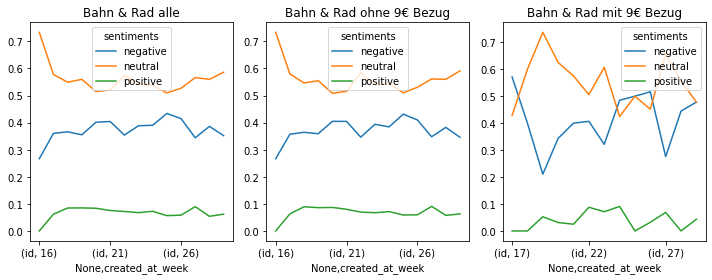

In [37]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))
df_sentiment_all_relat.T.plot.line(ax=ax1, title='Bahn & Rad alle')
df_sentiment_not_nine_relat.T.plot.line(ax=ax2, title='Bahn & Rad ohne 9€ Bezug')
df_sentiment_nine_relat.T.plot.line(ax=ax3, title='Bahn & Rad mit 9€ Bezug')

plt.tight_layout()

Hier ist nocheinmal das gesamte Datenset zu sehen, aber mit den direkten Sentiment-Werten der einzelnen Tweets pro Woche. Wir sehen im vgl. der prozentualen Berechnung, dass das Modell erwartungsgemäß funkioniert.

<ipython-input-38-483d914b7c73>:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



<AxesSubplot:xlabel='created_at_week'>

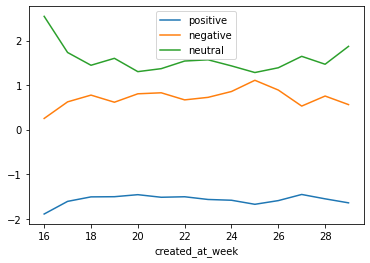

In [38]:
df['created_at_week'] = pd.to_datetime(df['created_at']).dt.week
df[['positive', 'negative', 'neutral']] = df[['positive', 'negative', 'neutral']].astype(float)
df[['created_at_week', 'positive', 'negative', 'neutral']].groupby('created_at_week').mean().plot.line()

In [39]:
df.to_pickle('dataset_sentimens.pckl')

Nachdem wir die Senitment-Analyse haben, folgt nun eine Cluster-Analyse in der Datei "Elbow_Method.jpynb". 